In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path , encoding= 'unicode_escape')

# Linear Regression Model

In [4]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.696087,0.248539,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.437273,0.248309,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.590435,0.160296,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.436957,0.186900,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [5]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [6]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.017540
1,holiday,2.177414
2,workingday,30.147930
3,temp,1.040456
4,hum,1.091456
5,windspeed,1.085817
6,weekend,13.038594


In [7]:
df = df.drop(columns=['weekend'])

In [8]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.937255
1,holiday,1.090550
2,workingday,3.241474
3,temp,7.453654
4,hum,9.788661
5,windspeed,4.891092


In [9]:
df = df.drop(columns=['hum'])

In [10]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.928057
1,holiday,1.080489
2,workingday,3.019413
3,temp,4.631002
4,windspeed,4.083302


In [11]:
df.head()

,yr,holiday,workingday,temp,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.160446,985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.248539,801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.248309,1349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.160296,1562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.186900,1600,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   windspeed     731 non-null    float64
 5   cnt           731 non-null    int64  
 6   season_2      731 non-null    bool   
 7   season_3      731 non-null    bool   
 8   season_4      731 non-null    bool   
 9   mnth_2        731 non-null    bool   
 10  mnth_3        731 non-null    bool   
 11  mnth_4        731 non-null    bool   
 12  mnth_5        731 non-null    bool   
 13  mnth_6        731 non-null    bool   
 14  mnth_7        731 non-null    bool   
 15  mnth_8        731 non-null    bool   
 16  mnth_9        731 non-null    bool   
 17  mnth_10       731 non-null    bool   
 18  mnth_11       731 non-null    

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [14]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [15]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['windspeed',
 'holiday',
 'temp',
 'mnth_7',
 'weekday_2',
 'season_4',
 'weekday_3',
 'season_2',
 'mnth_10',
 'mnth_8',
 'mnth_4',
 'mnth_2',
 'weekday_1',
 'weekday_6',
 'mnth_3',
 'yr',
 'mnth_11',
 'mnth_12',
 'mnth_9',
 'weathersit_3',
 'mnth_6',
 'weekday_5',
 'weekday_4',
 'weathersit_2',
 'mnth_5',
 'workingday',
 'season_3']

In [47]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [48]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 27)
(584,)
(147, 27)
(147,)


In [50]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [53]:
import joblib 
import os 

# Your specific directory
save_dir = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Create folder if missing
os.makedirs(save_dir, exist_ok=True)

# Final file path
save_path = os.path.join(save_dir, "lr_scaler.pkl")

# Save scaler
with open(save_path, 'wb') as f:
    joblib.dump(scaler, f)

print(f"Scaler saved successfully at: {save_path}")


Scaler saved successfully at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\lr_scaler.pkl


In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train[0:10]

array([[-0.99317398, -0.16783627,  0.66749124, -0.84514833,  0.49077526,
         1.68585446, -0.57735027, -0.57735027, -0.2819263 , -0.31264095,
         3.34165628, -0.31919711, -0.30263639, -0.29240701, -0.30263639,
        -0.27478436, -0.31264095, -0.3093296 , -0.3093296 , -0.40129017,
        -0.42121177, -0.40987803, -0.40702415,  2.43975018, -0.40416162,
         1.40697969, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.39486284, -0.68939939,
         1.68585446, -0.57735027, -0.57735027, -0.2819263 , -0.31264095,
        -0.2992528 ,  3.13286048, -0.30263639, -0.29240701, -0.30263639,
        -0.27478436, -0.31264095, -0.3093296 , -0.3093296 , -0.40129017,
        -0.42121177, -0.40987803, -0.40702415,  2.43975018, -0.40416162,
        -0.71074232, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.90172544, -0.94161059,
        -0.59317101, -0.57735027,  1.73205081, -0.2819263 , -0.31264095,
        -0.2992528 , -0.31919711, -0.30263639, -0.2924

In [54]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "linear_regression.pkl")

# Save the model
joblib.dump(regressor, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\linear_regression.pkl


In [60]:
y_pred = regressor.predict(X_test)

In [61]:
y_pred

array([64.93867761, 68.83902718, 36.42537653, 39.21156991, 57.62772298,
       39.06267986, 61.76219624, 78.89439968, 72.98822818, 36.9038575 ,
       39.6916607 , 39.5140089 , 41.3281875 , 69.35532754, 68.20949705,
       61.19087092, 80.50964494, 77.74317768, 53.83911491, 53.36115835,
       86.28616845, 52.92018761, 70.54685769, 66.94291273, 45.41471473,
       75.53240814, 73.59676683, 68.59759438, 83.34574745, 79.53482932,
       31.45885322, 72.22628294, 75.30299684, 69.55707425, 45.74989686,
       58.45298338, 82.36533461, 87.44653843, 53.78173665, 56.69032001,
       77.9465419 , 37.36906672, 75.68186758, 59.95922424, 84.73572355,
       85.57965156, 49.18119124, 60.7592897 , 55.64569005, 47.21606772,
       81.73012939, 82.18891067, 69.93832711, 79.12007605, 64.28554624,
       60.32108211, 56.07820638, 82.14416113, 81.48553022, 58.57396503,
       79.79003718, 62.47839721, 76.23665879, 82.77999783, 81.34758136,
       45.50456712, 73.46959485, 68.60192369, 86.26354426, 72.14

### Model Evaluation

In [62]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.573507592415629.
The Mean Squred Error(MSE) is 37.80509802293052.
The Root Mean Squared Error(RMSE) is 6.148585042343525.
The R2 Score is 0.8669097404239183.
Adjusted R2 is 0.8367127907722023.


In [64]:
regressor.coef_

array([ 7.44334157, -0.3937564 ,  0.85490284,  7.12136069, -1.45503708,
        3.09476714,  3.49956144,  5.89414743,  0.64090323,  1.6637056 ,
        1.09763863,  1.72792991,  0.89311608, -0.29580659,  0.43658576,
        1.43886779,  0.80164524, -0.02007812,  0.05500607, -0.19946277,
        0.15830638,  0.09791558,  0.35912361,  0.52157157,  0.82152407,
       -2.34058203, -3.90194382])

In [65]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
yr,7.443342
holiday,-0.393756
workingday,0.854903
temp,7.121361
windspeed,-1.455037
season_2,3.094767
season_3,3.499561
season_4,5.894147
mnth_2,0.640903
mnth_3,1.663706


In [66]:
regressor.intercept_

np.float64(65.2413014457131)

In [67]:
regressor.score(X_train,y_train)

0.8302151981982491

In [68]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [69]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.5735,37.8051,6.1486,0.8669,0.8367


In [71]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [72]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [73]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

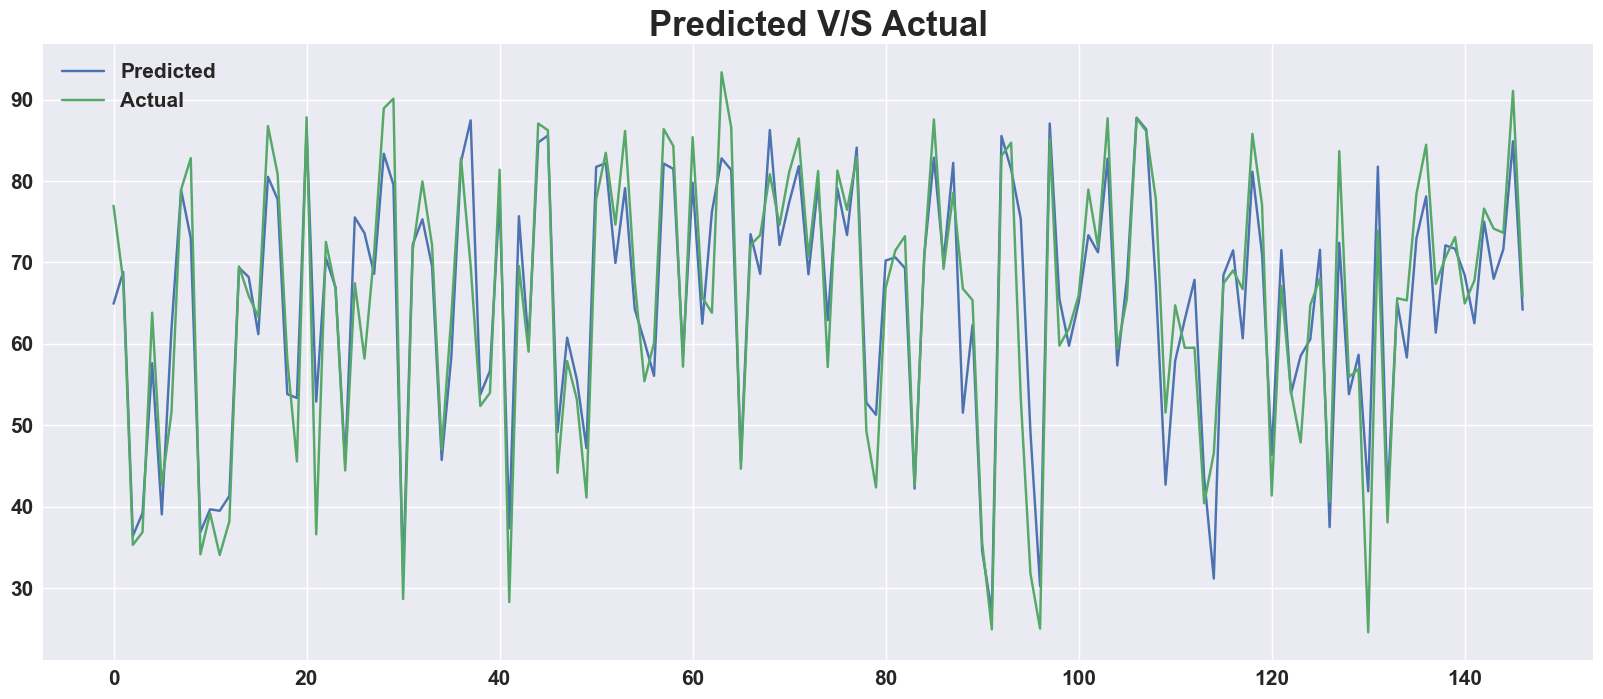

In [74]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

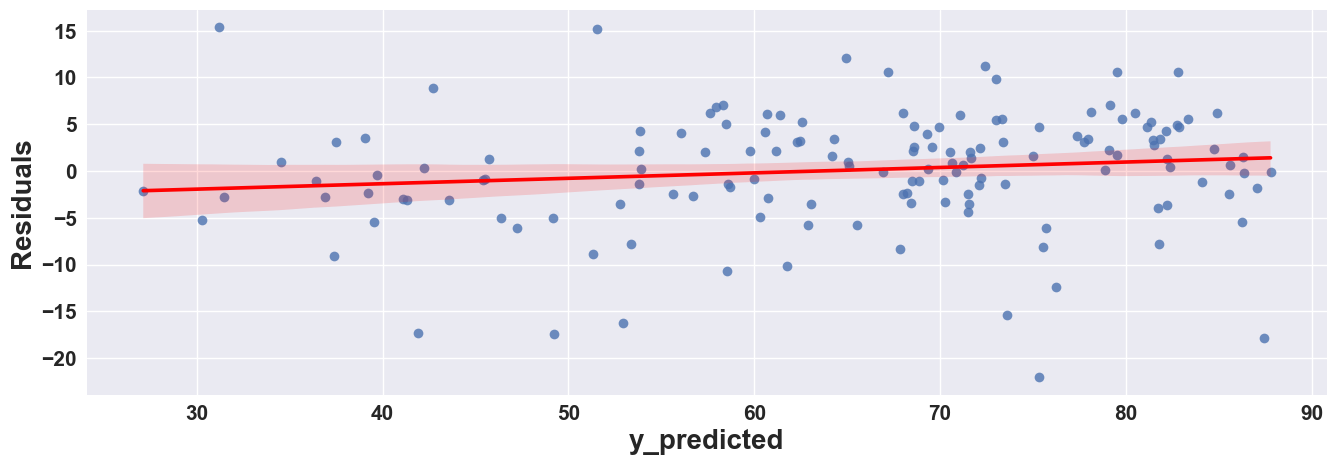

In [75]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

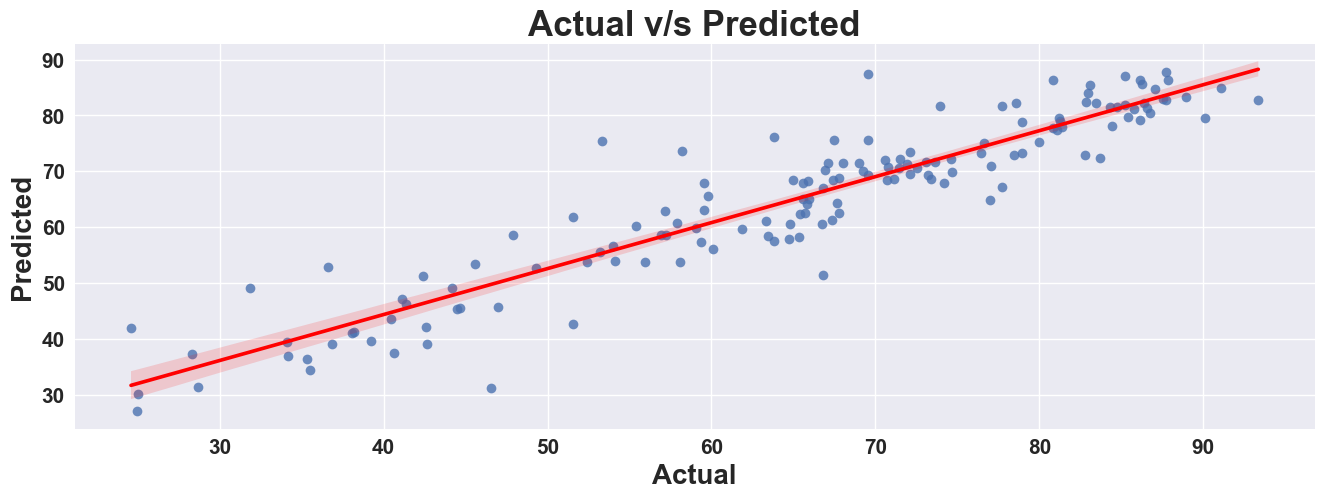

In [76]:
plot_scatter(y_pred,y_test)

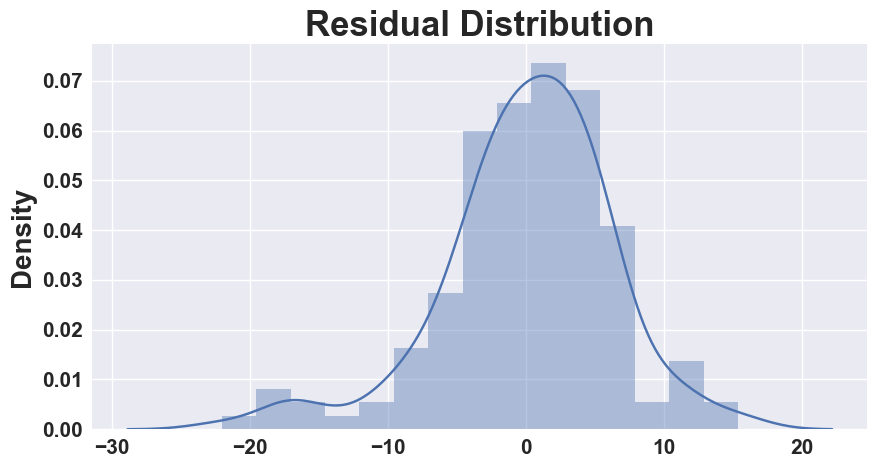

In [77]:
Residual_distPlot(y_pred,y_test)